# FInal Trainer after augmentation

In [3]:
! dir

 Volume in drive C is OS
 Volume Serial Number is A86C-A9FC

 Directory of C:\Users\hirsh\Downloads\NUS\SP_project\Trainer

29-06-2022  18:49    <DIR>          .
29-06-2022  18:44    <DIR>          ..
29-06-2022  18:47    <DIR>          .ipynb_checkpoints
29-06-2022  18:49             1,077 Final_Trainer.ipynb
29-06-2022  18:46    <DIR>          spiral_aug_processed
               1 File(s)          1,077 bytes
               4 Dir(s)  150,311,350,272 bytes free


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [65]:
import os
import cv2
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
plt.style.use('dark_background')

In [66]:
!ls

100_spiral_model.h5            models
After_Preprocessing            spiral
Cascade_Integration.ipynb      spiral_Augument
Exception_Handing.ipynb        spiral_aug_processed
FINAL_MODEL.ipynb              spiral_basic_model.ipynb
Final_Trainer                  spiral_data
Graphs                         spiral_final_model.ipynb
Original_data                  spiral_healthy_augumentor.py
Precessed_Trainer_Spiral.ipynb spiral_new
SPIRAL_MODEL.ipynb             spiral_parkinson_augumentor.py
Testing_01.ipynb               spiral_processed
Trainer_Spiral.ipynb           wave
Wave_Final_Model.ipynb         wave_basic_model.ipynb
cascade.xml                    wave_healthy_augumentor.py
modelp                         wave_parkinson_augumentor.py


In [73]:
os.chdir('Hand_drawings/')

In [74]:
!ls

100_spiral_model.h5            models
After_Preprocessing            spiral
Cascade_Integration.ipynb      spiral_Augument
Exception_Handing.ipynb        spiral_aug_processed
FINAL_MODEL.ipynb              spiral_basic_model.ipynb
Final_Trainer                  spiral_data
Graphs                         spiral_final_model.ipynb
Original_data                  spiral_healthy_augumentor.py
Precessed_Trainer_Spiral.ipynb spiral_new
SPIRAL_MODEL.ipynb             spiral_parkinson_augumentor.py
Testing_01.ipynb               spiral_processed
Trainer_Spiral.ipynb           wave
Wave_Final_Model.ipynb         wave_basic_model.ipynb
cascade.xml                    wave_healthy_augumentor.py
modelp                         wave_parkinson_augumentor.py


In [75]:
cur_dir = os.getcwd()

base_dir = os.path.join(cur_dir, 'spiral_new')
# os.mkdir(base_dir) #make base directory

In [76]:
dat = os.listdir(b)
print(dat)

['Testing_01.ipynb', '.DS_Store', 'Original_data', 'Cascade_Integration.ipynb', '100_spiral_model.h5', 'Final_Trainer', 'FINAL_MODEL.ipynb', 'spiral_basic_model.ipynb', 'spiral', 'spiral_processed', 'wave_parkinson_augumentor.py', 'models', 'cascade.xml', 'wave_basic_model.ipynb', 'Trainer_Spiral.ipynb', 'spiral_data', 'Wave_Final_Model.ipynb', 'After_Preprocessing', 'spiral_healthy_augumentor.py', 'Precessed_Trainer_Spiral.ipynb', 'spiral_Augument', 'SPIRAL_MODEL.ipynb', 'spiral_final_model.ipynb', 'wave_healthy_augumentor.py', '.ipynb_checkpoints', 'spiral_new', 'Graphs', 'wave', 'spiral_parkinson_augumentor.py', 'spiral_aug_processed', 'Exception_Handing.ipynb', 'modelp']


In [77]:
os.listdir(base_dir)

['test', 'train', 'validation']

In [78]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_h_dir = os.path.join(train_dir, 'healthy')
# os.mkdir(train_h_dir)

train_p_dir = os.path.join(train_dir, 'parkinson')
# os.mkdir(train_p_dir)

validation_h_dir = os.path.join(validation_dir, 'healthy')
# os.mkdir(validation_h_dir)

validation_p_dir = os.path.join(validation_dir, 'parkinson')
# os.mkdir(validation_p_dir)

test_h_dir = os.path.join(test_dir, 'healthy')
# os.mkdir(test_h_dir)

test_p_dir = os.path.join(test_dir, 'parkinson')
# os.mkdir(test_p_dir)

In [79]:
a, b, numbers = next(os.walk(train_h_dir))
print(len(numbers))

12000


In [80]:
a, b, numbers = next(os.walk(test_h_dir))
print(len(numbers))

1500


In [81]:
a, b, numbers = next(os.walk(validation_h_dir))
print(len(numbers))

0


# Training

In [82]:
train = tf.keras.utils.image_dataset_from_directory(train_dir)
data_iterator = train.as_numpy_iterator()


Found 24000 files belonging to 2 classes.


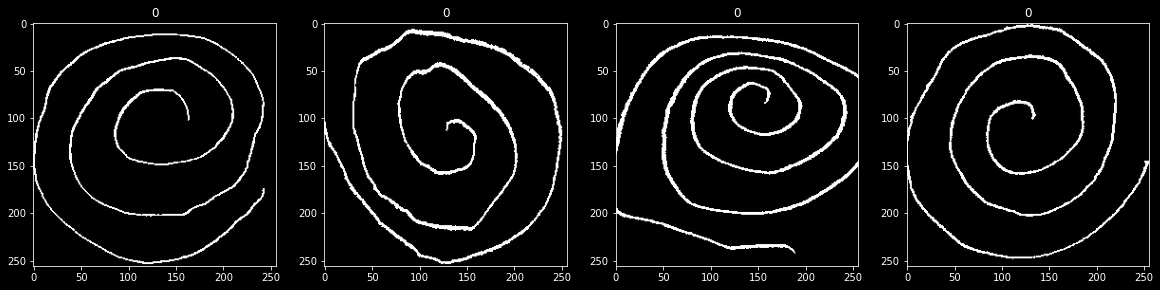

In [83]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [84]:

train = train.map(lambda x,y: (x/255, y))

In [85]:
train.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# Testing data

In [86]:
test = tf.keras.utils.image_dataset_from_directory(test_dir)
data_iterator = test.as_numpy_iterator()

Found 3000 files belonging to 2 classes.


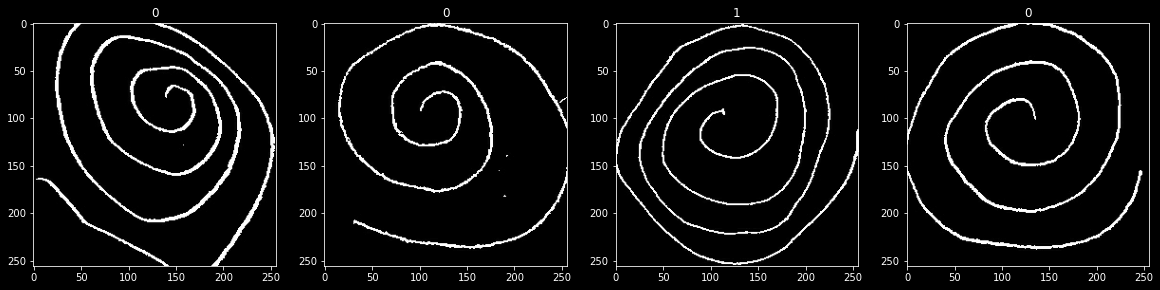

In [87]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [88]:
test = test.map(lambda x,y: (x/255, y))


In [89]:
test.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# Validation data

In [39]:

valid = tf.keras.utils.image_dataset_from_directory(validation_dir)
data_iterator = valid.as_numpy_iterator()

Found 3000 files belonging to 2 classes.


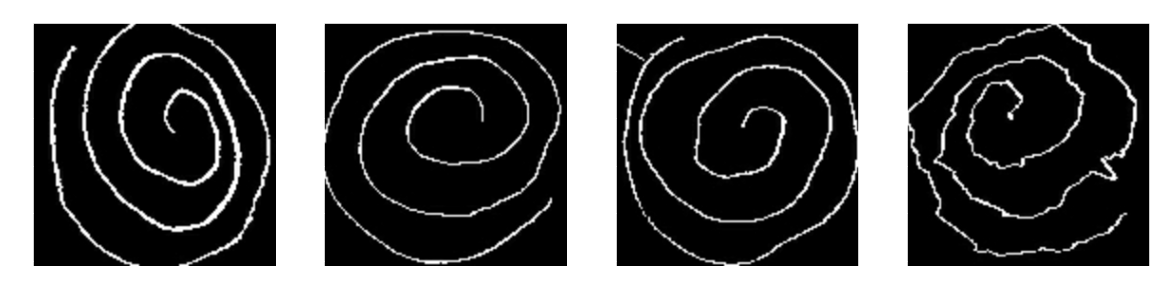

In [40]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
valid = valid.map(lambda x,y: (x/255, y))

In [42]:
valid.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [43]:
a, b, numbers = next(os.walk(train_p_dir))
print(len(numbers))

12000


In [44]:
a, b, numbers = next(os.walk(test_p_dir))
print(len(numbers))

1500


In [45]:
a, b, numbers = next(os.walk(validation_p_dir))
print(len(numbers))

1500


# Designing Neural Network

In [46]:
model = Sequential()

# Feature Layer
model.add(Conv2D(2, (15, 15), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (10, 10), activation='relu',strides=(2,2) ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))

#Hidden Layers

model.add(Dense(512, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 114, 114, 2)       1352      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 57, 57, 2)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 57, 57, 2)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 4)         804       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 4)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 4)         0

In [38]:

reduce_learningrate = ReduceLROnPlateau(
                              monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.00001)

In [39]:

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [40]:
history = model.fit(train,
                   epochs = 8,
                   validation_data = valid,
                   callbacks = [reduce_learningrate],
                   batch_size = 18)

Epoch 1/8
750/750 [==============================] - 2043s 3s/step - loss: 0.5921 - accuracy: 0.6741 - val_loss: 0.4791 - val_accuracy: 0.7750 - lr: 1.0000e-05
Epoch 2/8
750/750 [==============================] - 1954s 3s/step - loss: 0.4741 - accuracy: 0.7664 - val_loss: 0.4021 - val_accuracy: 0.8237 - lr: 1.0000e-05
Epoch 3/8
750/750 [==============================] - 1951s 3s/step - loss: 0.4176 - accuracy: 0.8016 - val_loss: 0.3327 - val_accuracy: 0.8773 - lr: 1.0000e-05
Epoch 4/8
750/750 [==============================] - 1960s 3s/step - loss: 0.3691 - accuracy: 0.8307 - val_loss: 0.2715 - val_accuracy: 0.9150 - lr: 1.0000e-05
Epoch 5/8
750/750 [==============================] - 1986s 3s/step - loss: 0.3355 - accuracy: 0.8513 - val_loss: 0.2179 - val_accuracy: 0.9360 - lr: 1.0000e-05
Epoch 6/8
750/750 [==============================] - 1959s 3s/step - loss: 0.3018 - accuracy: 0.8712 - val_loss: 0.1770 - val_accuracy: 0.9597 - lr: 1.0000e-05
Epoch 7/8
750/750 [=====================

C:\Users\hirsh\AppData\Local\Temp\ipykernel_1956\785622656.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
C:\Users\hirsh\AppData\Local\Temp\ipykernel_1956\785622656.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


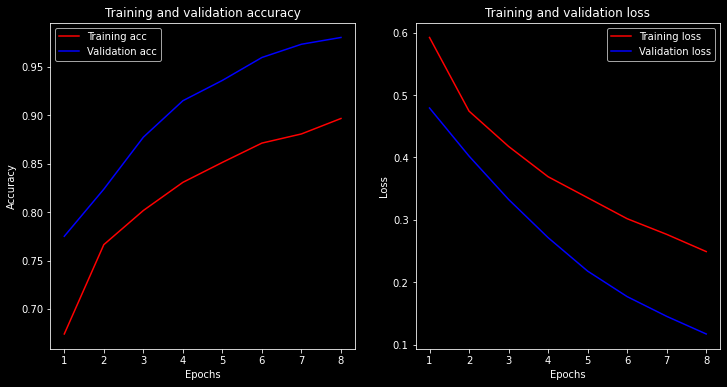

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
    
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
loss, accuracy = model.evaluate(train)

750/750 [==============================] - 277s 369ms/step - loss: 0.1109 - accuracy: 0.9835


In [43]:
loss, accuracy = model.evaluate(test)

94/94 [==============================] - 32s 339ms/step - loss: 0.1144 - accuracy: 0.9850


# Testing

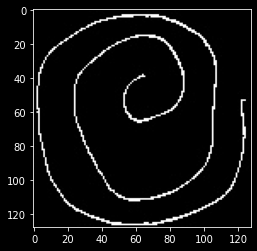

In [45]:
img_path = os.path.join(cur_dir, 'spiral_aug_processed/test/healthy/healthy_V01HE01_0_1791.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

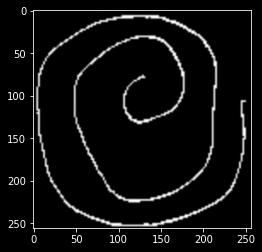

In [46]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.16678855]]


# Saving the model

In [5]:
cur_dir = os.getcwd()
model_path = os.path.join(cur_dir, 'model')

# if not os.path.exists(model_path):
#     os.makedirs(model_path)

json_model = os.path.join(model_path, 'model_structure.json')
weight_model = os.path.join(model_path, 'model_weights.h5')

In [50]:
# model_structure = model.to_json()
# with open(json_model ,"w") as f :
#     f.write(model_structure)

# model.save_weights(weight_model)

In [51]:
os.listdir(model_path)

['model_structure.json', 'model_weights.h5']

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import model_from_json, load_model

In [90]:
json_file = open(json_model,'r')
model_structure = json_file.read()
json_file.close()

model = model_from_json(model_structure)

model.load_weights(weight_model)

In [91]:
classifier_tree = DecisionTreeClassifier()

In [92]:
pred = model.predict(test)

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
data_iterator = test.as_numpy_iterator()

In [111]:
(x, y) = data_iterator.next()


AttributeError: 'tuple' object has no attribute 'all'

In [107]:
len(train)

750

In [109]:
len(x)

32

In [110]:
len(x)

32

In [ ]:
pred

In [ ]:

print(classification_report(y, pred, target_names=Labels1))
# print(confusion_matrix(y_test, y_predict))